In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
dataset = pd.read_csv('heat_capacity.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_all = scaler.transform(X) 

In [8]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1)) 

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1367232.7500 - mae: 1164.1393 - val_loss: 344948.2188 - val_mae: 509.1165
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 245086.1875 - mae: 401.0362 - val_loss: 154085.1094 - val_mae: 298.1722
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116299.4922 - mae: 265.9850 - val_loss: 84589.5625 - val_mae: 222.4090
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64842.8359 - mae: 192.3812 - val_loss: 46819.9219 - val_mae: 154.5522
Epoch 5/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37224.5938 - mae: 139.6476 - val_loss: 25998.9531 - val_mae: 113.0760
Epoch 6/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22099.1289 - mae: 103.3317 - val_loss: 14455.0010 - val_mae: 83.4798
Epoch 7/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10373.3779 - mae: 74.5470 - val_loss: 7991.1997 - val_mae: 61.1536
Epoch 8/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6410.0586 - mae: 56

In [12]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = np.mean(np.abs((np.array(y_test) - np.array(y_test_pred)) / np.array(y_test))) * 100

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [13]:
print(f"Mean Squared Error on Test Set: {mse_test}")
print(f"Mean Absolute Error on Test Set: {mae_test}")
print(f"R^2 Score on Test Set: {r2_test}")
print("Mean Absolute Percentage Error:", mape_test, "%")

Mean Squared Error on Test Set: 8.374195057576312
Mean Absolute Error on Test Set: 2.048668293162249
R^2 Score on Test Set: 0.9947370766351875
Mean Absolute Percentage Error: 3.0370223862737924 %


In [15]:
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = np.mean(np.abs((np.array(y_train) - np.array(y_train_pred)) / np.array(y_train))) * 100

243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
print(f"Mean Squared Error on Test Set: {mse_train}")
print(f"Mean Absolute Error on Test Set: {mae_train}")
print(f"R^2 Score on Test Set: {r2_train}")
print("Mean Absolute Percentage Error:", mape_train, "%")

Mean Squared Error on Test Set: 7.6885973314147655
Mean Absolute Error on Test Set: 2.0821117461552263
R^2 Score on Test Set: 0.9953516949745106
Mean Absolute Percentage Error: 3.1657286862935825 %


In [20]:
predictions = model.predict(X_all)

303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
print(predictions)

[[1200.3824]
 [1198.9547]
 [1187.3519]
 ...
 [1187.0221]
 [1192.7979]
 [1198.0413]]


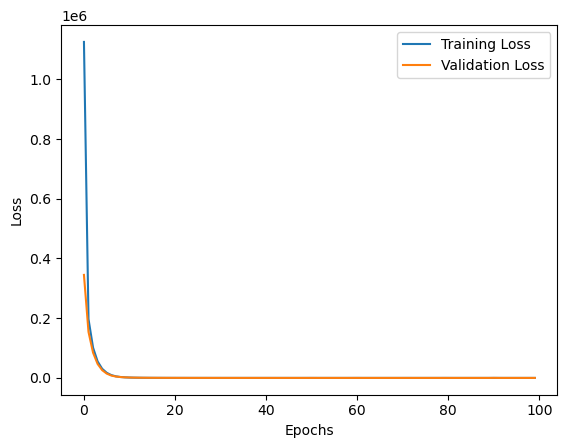

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

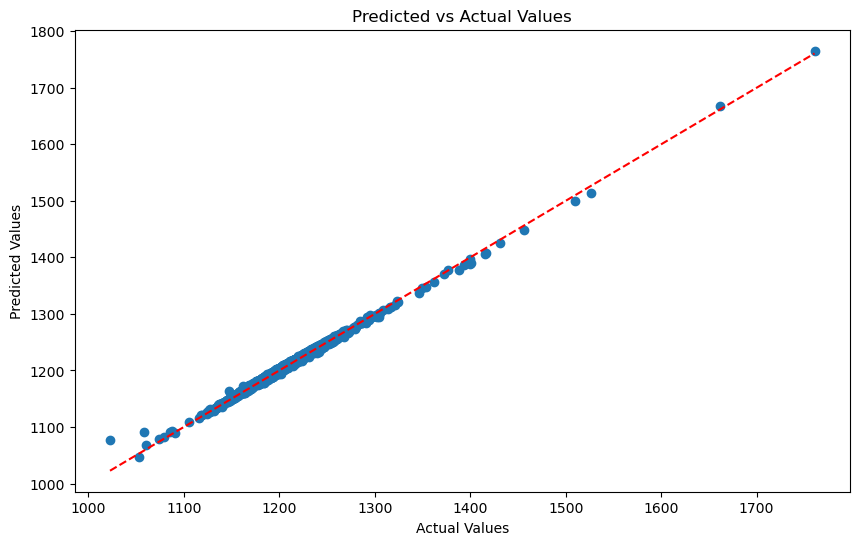

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

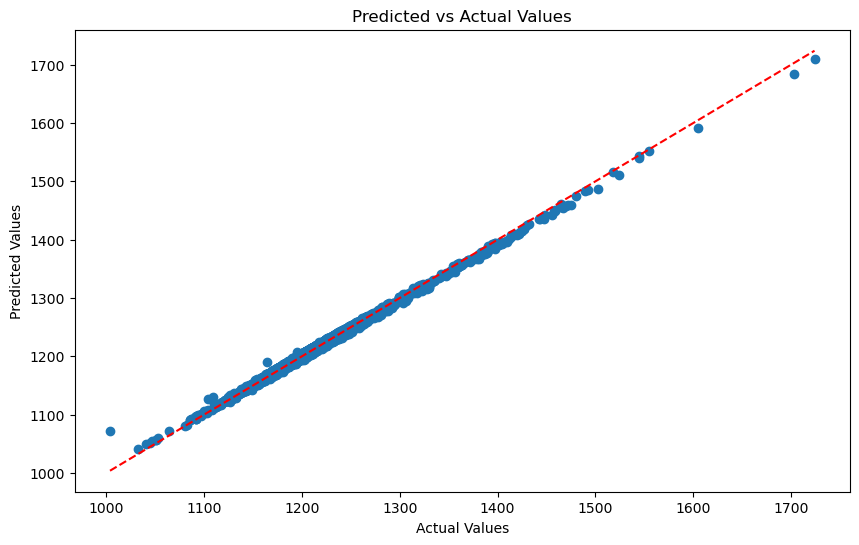

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

In [26]:
predictions = predictions.ravel()  # or use .flatten()

# Create a new DataFrame with predictions
new_df = pd.DataFrame({'Predictions': predictions})

# Join with the original dataset
joined_data = dataset.join(new_df)
print(joined_data.head())

         GR      DPHI      TNPH    TBIT30  DTCO_MPS_FINAL      RHOB       UCS  \
0  133.2880  0.035372  0.061501  85.85635        56.94103  2.591483  16131.45   
1  141.2310  0.034830  0.061533  77.46809        56.97847  2.592007  16482.31   
2  137.1627  0.030458  0.060160  59.74663        57.15356  2.595690  16911.55   
3  140.2624  0.032882  0.059916  61.63119        57.41502  2.594137  17156.11   
4  151.1480  0.031895  0.059520  62.33526        57.77623  2.598559  17437.35   

     TIMANI      TZSG        PR      VPVS   YME_STA  DTST_STM_2      C(capa)  \
0  0.818450  1.103766  0.313236  1.917596  3.802793    211.3686  1202.579264   
1  0.740217  1.103768  0.310999  1.909318  3.885505    211.2205  1201.007841   
2  0.642289  1.103769  0.308975  1.901961  3.986692    211.3013  1188.328577   
3  0.549908  1.103771  0.306235  1.892207  4.044345    210.9722  1195.359221   
4  0.419688  1.103773  0.303696  1.883367  4.110643    210.9480  1192.495935   

   Predictions  
0  1200.382446 

In [27]:
dataset_thermal = pd.read_csv('thermal_conductivity.csv')

In [28]:
N = dataset_thermal.iloc[:, 0]
print(N)

0        6008.0
1        6008.5
2        6009.0
3        6009.5
4        6010.0
         ...   
9685    10890.0
9686    10890.5
9687    10891.0
9688    10891.5
9689    10892.0
Name: MD, Length: 9690, dtype: float64


In [29]:
new = pd.DataFrame({'Depth': N})
joined_data = joined_data.join(new)
joined_data.head()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa),Predictions,Depth
0,133.2880,0.035372,0.061501,85.85635,56.94103,2.591483,16131.45,0.818450,1.103766,0.313236,1.917596,3.802793,211.3686,1202.579264,1200.382446,6008.0
1,141.2310,0.034830,0.061533,77.46809,56.97847,2.592007,16482.31,0.740217,1.103768,0.310999,1.909318,3.885505,211.2205,1201.007841,1198.954712,6008.5
2,137.1627,0.030458,0.060160,59.74663,57.15356,2.595690,16911.55,0.642289,1.103769,0.308975,1.901961,3.986692,211.3013,1188.328577,1187.351929,6009.0
3,140.2624,0.032882,0.059916,61.63119,57.41502,2.594137,17156.11,0.549908,1.103771,0.306235,1.892207,4.044345,210.9722,1195.359221,1193.907227,6009.5
4,151.1480,0.031895,0.059520,62.33526,57.77623,2.598559,17437.35,0.419688,1.103773,0.303696,1.883367,4.110643,210.9480,1192.495935,1191.504272,6010.0


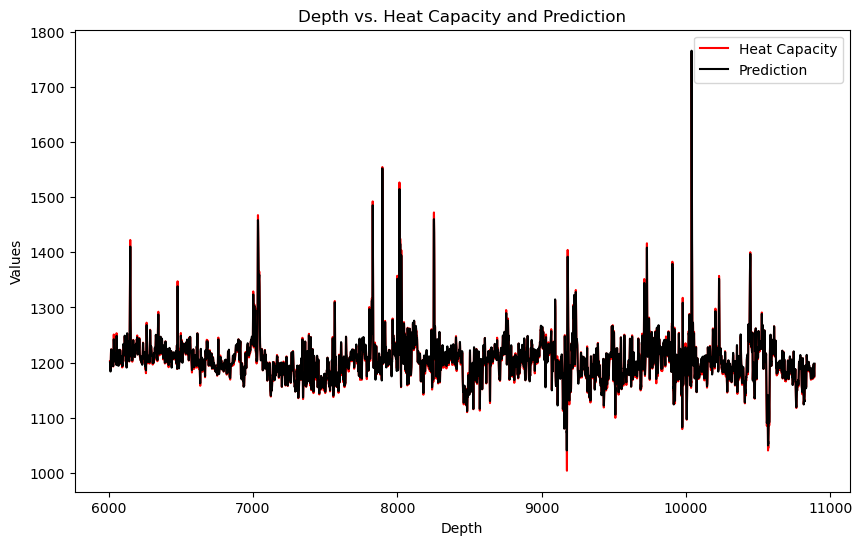

In [30]:
plt.figure(figsize=(10, 6))

# Plotting Heat Capacity vs. Depth
plt.plot(joined_data['Depth'], joined_data['C(capa)'], label='Heat Capacity', color='red')

# Plotting Prediction vs. Depth
plt.plot(joined_data['Depth'], joined_data['Predictions'], label='Prediction', color='black')

# Line of perfect prediction for Heat Capacity (y=x line assuming Prediction ideally matches Heat Capacity)


# Adding labels and legend
plt.xlabel('Depth')
plt.ylabel('Values')
plt.title('Depth vs. Heat Capacity and Prediction')
plt.legend()  # Automatically uses labels from each plot command

# Show the plot
plt.show()